In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, SimpleRNN, Input
from tensorflow.keras.models import Sequential

In [2]:
data = pd.read_csv("all_templates_2.csv", header = None)
train_y = np.array(data[data.shape[1]-1])  # метки выборки
train_y = train_y.reshape(train_y.shape[0],1)
#train_y = train_y.T
data = data.drop([data.shape[1]-1], axis=1)
train_x = np.array(data)  # сама выборка

y = train_y
train_y = keras.utils.to_categorical(train_y,num_classes=2) # категорирование
train_x = np.expand_dims(train_x, axis=2)

n_features = train_x.shape[1]

test_x = pd.read_csv("template_1_test.csv", header=None) # получить тестовый набор

Атомарная ФА - это softsign(...): Softsign activation function, softsign(x) = x / (abs(x) + 1)
Стандартными сигмоидальными функциями активации, приводимыми в литературе. (одна из)

In [3]:
model = Sequential()
model.add(Input((n_features,1)))
model.add(SimpleRNN(122, activation='tanh')) # кол-во нейронов не менять
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 122)               15128     
_________________________________________________________________
dense (Dense)                (None, 2)                 246       
Total params: 15,374
Trainable params: 15,374
Non-trainable params: 0
_________________________________________________________________


In [42]:
from tensorflow.keras.layers import Dense, Embedding, LSTM

model = tf.keras.Sequential()
model.add(Input((n_features,1)))

# Добавим слой LSTM с 128 внутренними узлами.
model.add(LSTM(120, dropout = 0.2, recurrent_dropout=0.2))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 120)               58560     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 242       
Total params: 58,802
Trainable params: 58,802
Non-trainable params: 0
_________________________________________________________________


In [16]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [43]:
model.compile(loss='categorical_crossentropy', metrics=METRICS, optimizer='adam')

In [44]:
history = model.fit(train_x, train_y, batch_size=32, epochs=50, validation_split=0.45)

Train on 33 samples, validate on 28 samples
Epoch 1/50
33/33 [==============================] - 11s 331ms/sample - loss: 0.6882 - tp: 19.0000 - fp: 11.0000 - tn: 22.0000 - fn: 14.0000 - accuracy: 0.6212 - precision: 0.6333 - recall: 0.5758 - auc: 0.5542 - val_loss: 0.7171 - val_tp: 0.0000e+00 - val_fp: 28.0000 - val_tn: 0.0000e+00 - val_fn: 28.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 2/50
33/33 [==============================] - 0s 12ms/sample - loss: 0.6504 - tp: 18.0000 - fp: 15.0000 - tn: 18.0000 - fn: 15.0000 - accuracy: 0.5455 - precision: 0.5455 - recall: 0.5455 - auc: 0.7107 - val_loss: 0.7523 - val_tp: 0.0000e+00 - val_fp: 28.0000 - val_tn: 0.0000e+00 - val_fn: 28.0000 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 3/50
33/33 [==============================] - 0s 12ms/sample - loss: 0.6352 - tp: 18.0000 - fp: 15.0000 - tn: 18.0000 - fn: 15.0000 - 

33/33 [==============================] - 0s 11ms/sample - loss: 0.5596 - tp: 21.0000 - fp: 12.0000 - tn: 21.0000 - fn: 12.0000 - accuracy: 0.6364 - precision: 0.6364 - recall: 0.6364 - auc: 0.7163 - val_loss: 0.9223 - val_tp: 19.0000 - val_fp: 9.0000 - val_tn: 19.0000 - val_fn: 9.0000 - val_accuracy: 0.6786 - val_precision: 0.6786 - val_recall: 0.6786 - val_auc: 0.4605
Epoch 22/50
33/33 [==============================] - 0s 10ms/sample - loss: 0.5275 - tp: 25.0000 - fp: 8.0000 - tn: 25.0000 - fn: 8.0000 - accuracy: 0.7576 - precision: 0.7576 - recall: 0.7576 - auc: 0.8090 - val_loss: 1.0338 - val_tp: 18.0000 - val_fp: 10.0000 - val_tn: 18.0000 - val_fn: 10.0000 - val_accuracy: 0.6429 - val_precision: 0.6429 - val_recall: 0.6429 - val_auc: 0.4452
Epoch 23/50
33/33 [==============================] - 0s 12ms/sample - loss: 0.4961 - tp: 21.0000 - fp: 12.0000 - tn: 21.0000 - fn: 12.0000 - accuracy: 0.6364 - precision: 0.6364 - recall: 0.6364 - auc: 0.7548 - val_loss: 1.1765 - val_tp: 12.000

33/33 [==============================] - 0s 12ms/sample - loss: 0.4961 - tp: 24.0000 - fp: 9.0000 - tn: 24.0000 - fn: 9.0000 - accuracy: 0.7273 - precision: 0.7273 - recall: 0.7273 - auc: 0.8081 - val_loss: 0.6901 - val_tp: 21.0000 - val_fp: 7.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.6696
Epoch 43/50
33/33 [==============================] - 0s 13ms/sample - loss: 0.4485 - tp: 26.0000 - fp: 7.0000 - tn: 26.0000 - fn: 7.0000 - accuracy: 0.7879 - precision: 0.7879 - recall: 0.7879 - auc: 0.8563 - val_loss: 0.6727 - val_tp: 21.0000 - val_fp: 7.0000 - val_tn: 21.0000 - val_fn: 7.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.6696
Epoch 44/50
33/33 [==============================] - 0s 12ms/sample - loss: 0.4998 - tp: 24.0000 - fp: 9.0000 - tn: 24.0000 - fn: 9.0000 - accuracy: 0.7273 - precision: 0.7273 - recall: 0.7273 - auc: 0.8338 - val_loss: 0.7036 - val_tp: 21.0000 - va

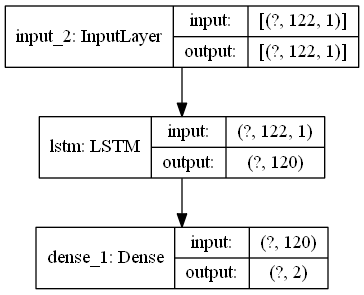

In [5]:
# начертить модель
keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

In [16]:
def pred(y_p):
    y_pred = []

    for i in range(len(y_p)):
        if y_p[i][0] < y_p[i][1]:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_prob = model.predict_proba(train_x)
y_pr = pred(y_prob)

fpr, tpr, thresholds = roc_curve(y, y_pr)
auc_keras = auc(fpr, tpr)

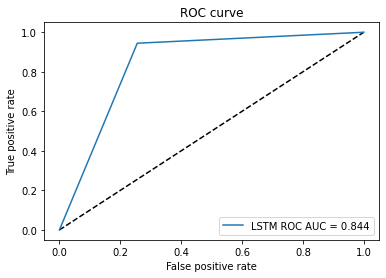

In [18]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LSTM ROC AUC = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

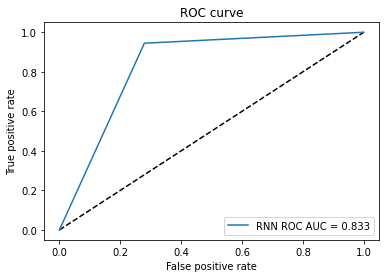

In [18]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RNN ROC AUC = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

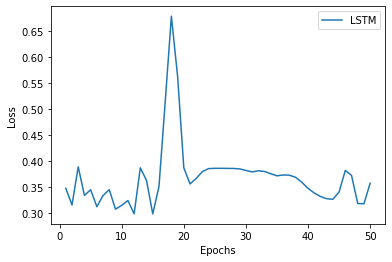

In [21]:
#LSTM

loss_values_LSTM = history.history['loss']
epochs_l = range(1, len(loss_values_LSTM)+1)

plt.plot(epochs_l, loss_values_LSTM, label='LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

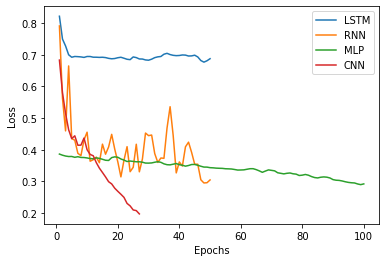

In [64]:
loss_MLP = pd.read_csv("MLP_loss.csv", header = None)
loss_MLP = np.array(loss_MLP)
loss_MLP = loss_MLP.reshape(loss_MLP.shape[1],1)
epochs_m = range(1, 101)

loss_CNN = pd.read_csv("CNN_loss.csv", header = None)
loss_CNN = np.array(loss_CNN)
loss_CNN = loss_CNN.reshape(loss_CNN.shape[1],1)
epochs_c = range(1, 28)

loss_values_RNN = history.history['loss']
epochs_r = range(1, len(loss_values_RNN)+1)

plt.plot(epochs_r, loss_values_LSTM, label='LSTM')
plt.plot(epochs_l, loss_values_RNN, label='RNN')
plt.plot(epochs_m, loss_MLP, label='MLP')
plt.plot(epochs_c, loss_CNN, label='CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
test_x = pd.read_csv("template_4_test.csv", header=None)
test_x = np.array(test_x)
test_x = np.expand_dims(test_x, axis=2)
pred = model.predict(test_x)  # тест
pred

array([[0.03440222, 0.9655978 ]], dtype=float32)

In [ ]:
test_y = [1]
test_y = np.array(test_y)
test_y = keras.utils.to_categorical(test_y,2)

model.evaluate(test_x, test_y)

In [12]:
# для RNN
test_x = pd.read_csv("test_templates00110.csv", header=None)
test_x = np.array(test_x)
test_x = np.expand_dims(test_x, axis=2)

test_y = [0,0,1,1,0]
test_y = np.array(test_y)
test_y = keras.utils.to_categorical(test_y,2)
model.evaluate(test_x, test_y)

5/5 [==============================] - 0s 7ms/sample - loss: 0.0682 - tp: 5.0000 - fp: 0.0000e+00 - tn: 5.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000


[0.06821594387292862, 5.0, 0.0, 5.0, 0.0, 1.0, 1.0, 1.0, 1.0]

In [26]:
y_test = model.predict_proba(test_x)
y_test = pred(y_test)
y_test

[0, 0, 1, 1, 0]

In [33]:
import csv

with open('Simple_RNN_pred.csv', 'w', newline="") as f:
    writer = csv.writer(f)
    writer.writerow(y_pr)

In [20]:
import csv

with open('LSTM_pred.csv', 'w', newline="") as f:
    writer = csv.writer(f)
    writer.writerow(y_pr)